IE 7300: Statistical learning for Engineering
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<h1><center><font size="7">Finial Project</font></center></h1>
<center><font size="3">Weihua Pan</font></center>
<center><font size="3">206-822-8347</font></center>
<center><font size="3">pan.weih@northeastern.edu</font></center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<font size="3">Percentage of Effort Contributed by Student : 100%</font><br>
<font size="3">Signature of Student : Weihua Pan</font><br>
<font size="3">Submission Date: 12/15/2023</font><br>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',30)

# Project Overview

<p>In this Project, I will go through the steps how to use machine learning to find out whether a mushroom is edible or poisonous by its features.
<ul>
<li>Problem Statement</li>
<li>Data Used</li>
<li>Analysis
    <ul>
    <li>Exploratory Data Analysis (EDA)</li>
    <li>Algorithm and Models</li>
    <li>Methodology</li>
    <li>Model Outcome/Performance Metrics</li>
    <li>Conclusion</li>
    </ul>
</li>
</p>

# Problem Statement 

##  Clearly define the  problem statement 

<strong>Problem statement <strong>: To determine whether some features of Mushroom,such as `cap diameter`, `cap shape` and `cap color`,can be used to predict its edibility.

## State your hypothesis 

<strong> Hypothesis <strong>: Mushrooms with specify feature characteristic are more likely to be edible or poisonous.

# Data Used

The dataset we use is from UCI machine learning repository.

## Present the dataset and include a data dictionary

In [37]:
df = pd.read_csv("MushroomDataset/secondary_data.csv",sep=";")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


The dataset contains 61069 rows and 21 columns. The target variable is class (e or p).

In [38]:
df.select_dtypes(include='object')

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,w
1,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,u
2,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,w
3,p,f,h,e,f,e,NaN,w,s,y,w,u,w,t,p,NaN,d,w
4,p,x,h,o,f,e,NaN,w,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,s,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,f,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,s,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,f,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


17 of them are categorical feature :['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']<br> I will do one-hot-encode later.

In [39]:
df.select_dtypes(include='number')

,cap-diameter,stem-height,stem-width
0,15.26,16.95,17.09
1,16.60,17.99,18.19
2,14.07,17.80,17.74
3,14.17,15.77,15.98
4,14.64,16.53,17.20
...,...,...,...
61064,1.18,3.93,6.22
61065,1.27,3.18,5.43
61066,1.27,3.86,6.37
61067,1.24,3.56,5.44


3 of them are numerical: ['cap-diameter', 'stem-height', 'stem-width']. 

### Dataset Dictionary

Target variable: `class` divided in edible=e and poisonous=p
<br>
n: nominal, m: metrical<br>
<br>
1. cap-diameter (m): float number in cm
2. cap-shape (n): 
    * bell=b, 
    * conical=c, 
    * convex=x, 
    * flat=f,
    * sunken=s, 
    * spherical=p, 
    * others=o
3. cap-surface (n): 
    * fibrous=i,
    * grooves=g, 
    * scaly=y, 
    * smooth=s,
    * shiny=h, 
    * leathery=l, 
    * silky=k, 
    * sticky=t,
    * wrinkled=w, 
    * fleshy=e
4. cap-color (n): 
* brown=n, 
* buff=b, 
* gray=g, 
* green=r, 
* pink=p,
* purple=u, 
* red=e, 
* white=w, 
* yellow=y, 
* blue=l,
* orange=o, 
* black=k
5. does-bruise-bleed (n): 
* bruises-or-bleeding=t,
* no=f
6. gill-attachment (n): 
* adnate=a, 
* adnexed=x, 
* decurrent=d, 
* free=e,
* sinuate=s, 
* pores=p, 
* none=f, 
* unknown=?
7. gill-spacing (n): 
* close=c, 
* distant=d, 
* none=f
8. gill-color (n): 
* see cap-color + 
* none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): 
* bulbous=b, 
* swollen=s, 
* club=c, 
* cup=u, 
* equal=e,
* rhizomorphs=z, 
* rooted=r
12. stem-surface (n): 
    see cap-surface + none=f
13. stem-color (n): 
see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): 
* ring=t, 
* none=f
17. ring-type (n): 
* cobwebby=c, 
* evanescent=e, 
* flaring=r, 
* grooved=g,
* large=l, 
* pendant=p, 
* sheathing=s, 
* zone=z, 
* scaly=y, 
* movable=m, 
* none=f, 
* unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): 
* grasses=g, 
* leaves=l, 
* meadows=m, 
* paths=p, 
* heaths=h,
* urban=u, 
* waste=w, 
* woods=d
20. season (n): 
* spring=s, 
* summer=u, 
* autumn=a, 
* winter=w

Most of the columns are categorical, so I need to do one-hot-encoding for these categorical data in order to train a model

## Explain how this dataset supports your hypothesis

In [40]:
# split mushrooms df into poison and edible df.
poison = df[df['class']=='p']
edible = df[df['class']=='e']

In [41]:
print(f"edible: { poison.shape[0]}" )
print(f"poison: {edible.shape[0]}"  )

edible: 33888
poison: 27181


In [42]:
p_color = poison['cap-color'].value_counts().index
p_counts = poison['cap-color'].value_counts().values
e_color = edible['cap-color'].value_counts().index
e_counts = edible['cap-color'].value_counts().values

In [43]:
color_code = {"n":"brown",
             "b":"#f0dc82", #buff
             "g":"gray", 
             "r":"green", 
             "p":"pink",
             "u":"purple", 
             "e":"red", 
             "w":"white", 
             "y":"yellow", 
             "l":"blue",
             "o":"orange", 
             "k":"black"}

In [44]:
color_map = {"n":"brown",
             "b":"buff", #buff
             "g":"gray", 
             "r":"green", 
             "p":"pink",
             "u":"purple", 
             "e":"red", 
             "w":"white", 
             "y":"yellow", 
             "l":"blue",
             "o":"orange", 
             "k":"black"}

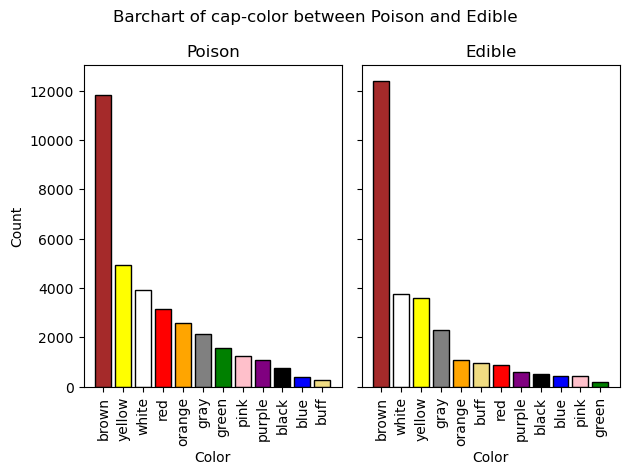

In [45]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(1,2,sharey=True)

ax[0].bar([color_map[c] for c in p_color],p_counts,color=[color_code[code] for code in p_color],
          edgecolor='black')
ax[0].set_title('Poison')

# 
ax[1].bar([color_map[c] for c in e_color],e_counts,color=[color_code[code] for code in e_color],
          edgecolor='black')
ax[1].set_title('Edible')

# rotate xlabels
ax[0].set_xticklabels([color_map[c] for c in p_color],rotation=90)
ax[1].set_xticklabels([color_map[c] for c in e_color],rotation=90)
ax[0].set_xlabel('Color')
ax[1].set_xlabel('Color')
ax[0].set_ylabel("Count")

fig.suptitle("Barchart of cap-color between Poison and Edible")

plt.tight_layout()
plt.show()

Using `cap-color` and other features, we are able to find some pattern to classify base on these features. For example, From the above plot, We can see most green and red mushroom are poisonous. In addition, the most common color is brown for both poison and edible mushrooms, Therefore, it might be tough to use brown to classify whether a mushroom is poisonous or edible.

# Exploratory Data Analysis(EDA)

## Descriptive Statistics

In [46]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Only 3 columns are numerical.<br>
1. cap-diameter:
    * min: 0.38 cm
    * max: 62.34 cm
    * mean 6.7 cm
2. stem-height:
    * min: 0 cm
    * max: 33.92 cm
    * mean 6.58 cm
3. stem-width:
    * min: 0 cm
    * max: 103.91 cm
    * mean: 10.03 cm

Base on the basic statistic, I can take a guess `cap-diameter` and `stem-height` are in right skewed, and `stem-width` is about normal by mean and 50% quartile. And they all have some outliers. I will consider whether remove them later.

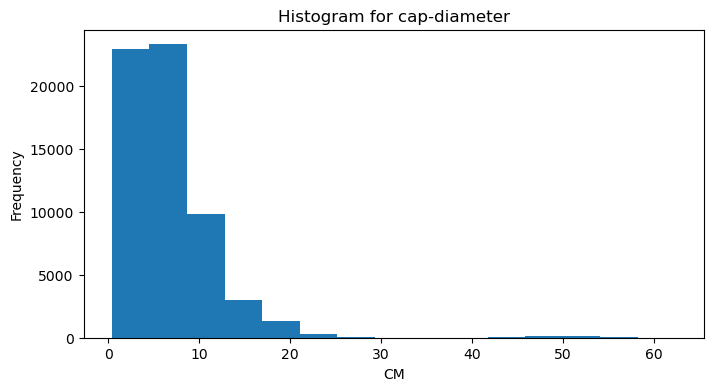

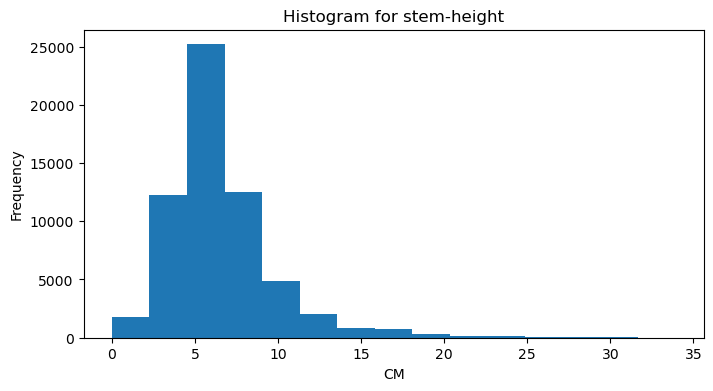

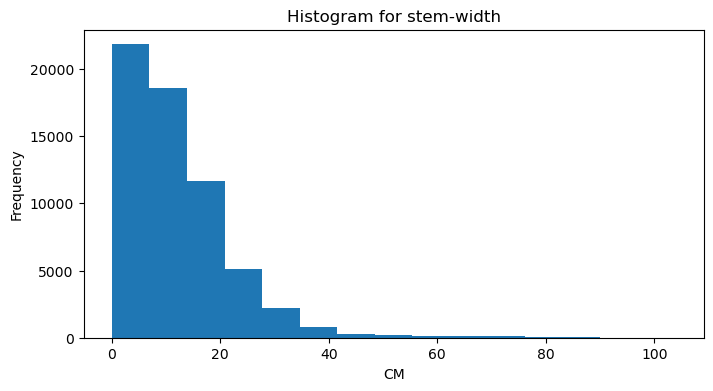

In [47]:
# draw histogram for all numerical columns
numerical_columns = df.select_dtypes(include='number')

for column in numerical_columns:
    fig, ax = plt.subplots(figsize=(8, 4))
    df[column].plot(kind='hist', title=f"Histogram for {column}", ax=ax,bins=15)
    ax.set_xlabel("CM")
    plt.show()


By the histogram plot, we can see `cap-diameter` and `stem-width` are right skewed. And only `stem-height` is normal distributive.

## Bar chart among 2 target variables

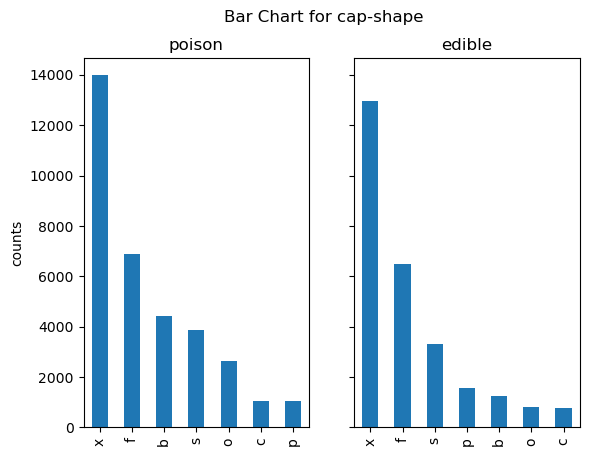

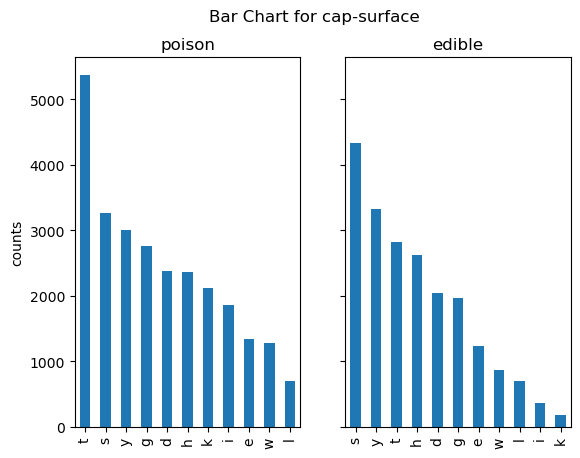

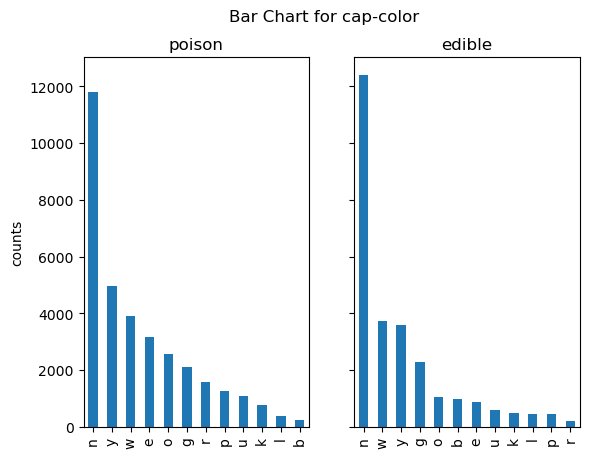

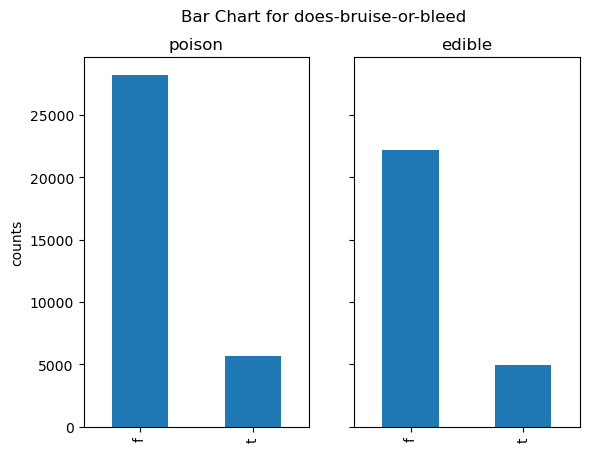

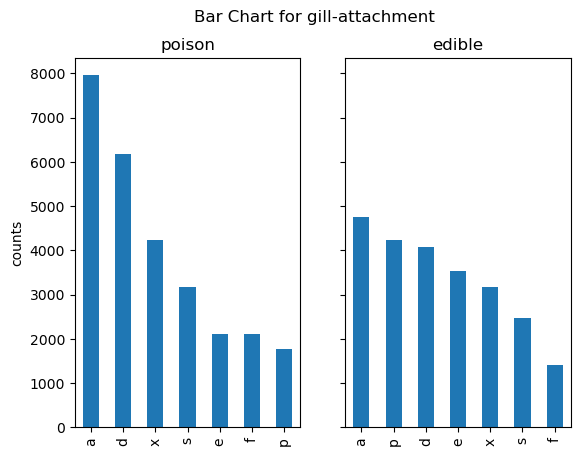

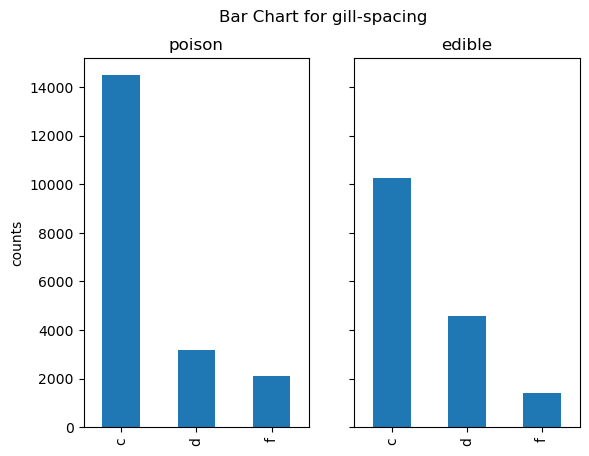

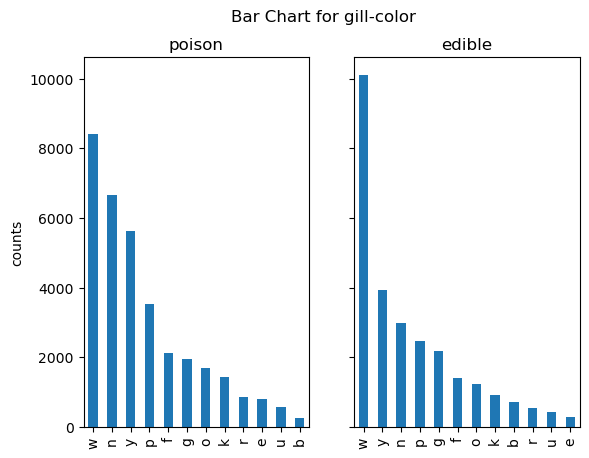

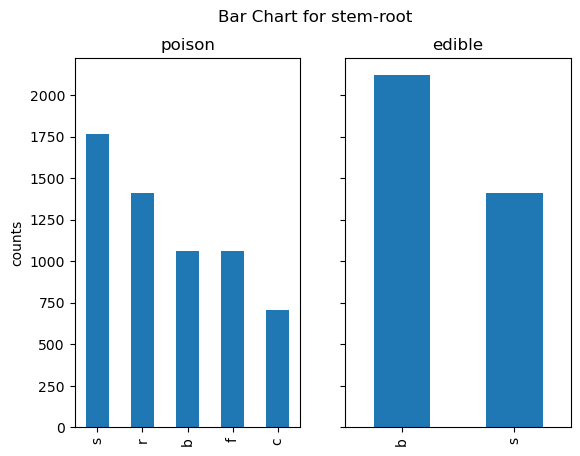

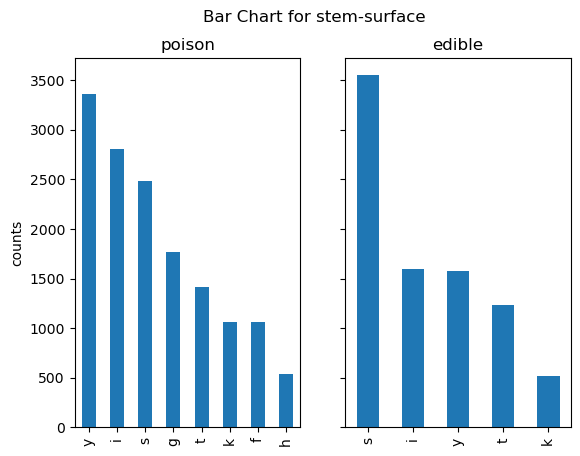

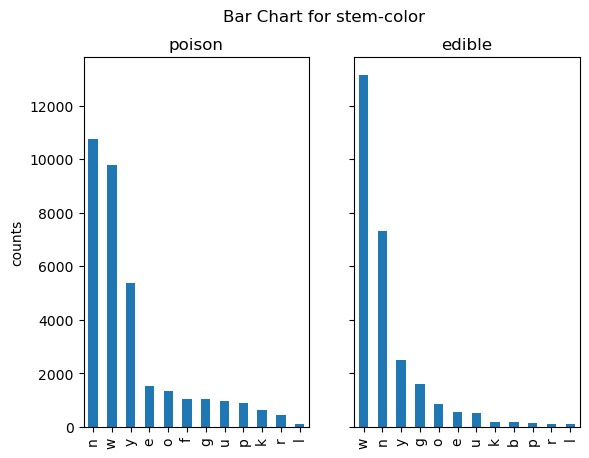

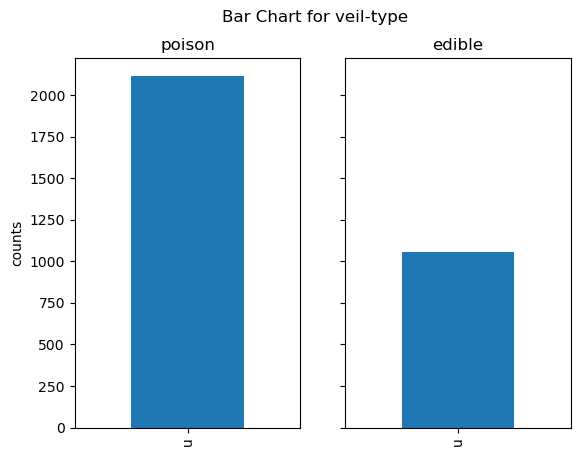

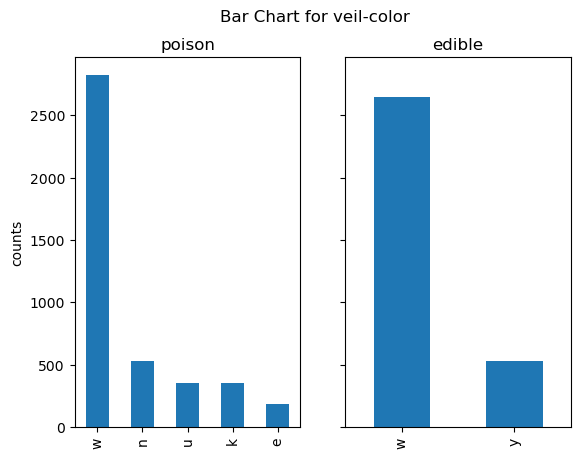

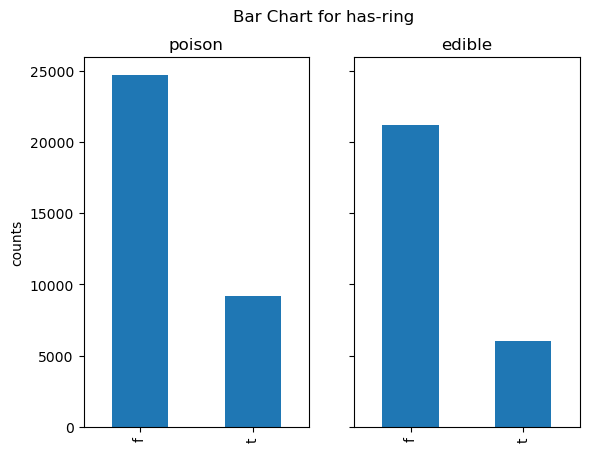

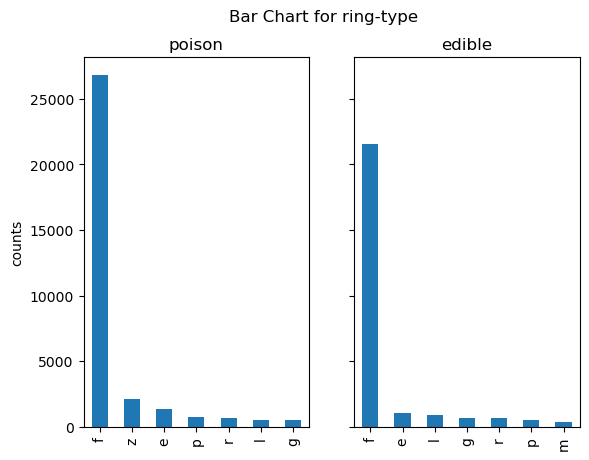

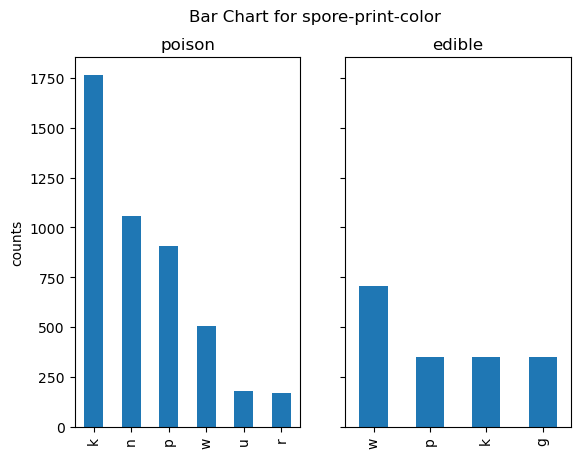

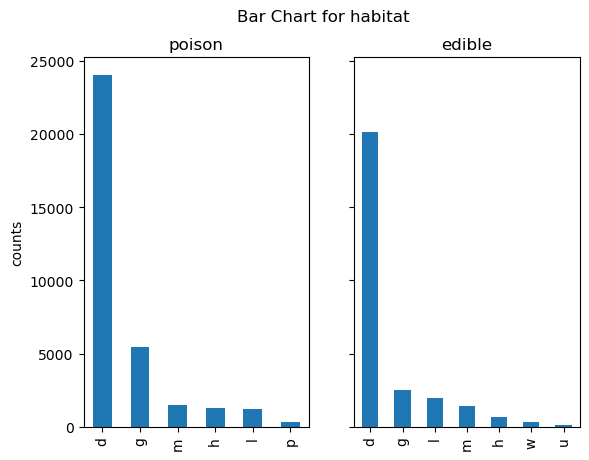

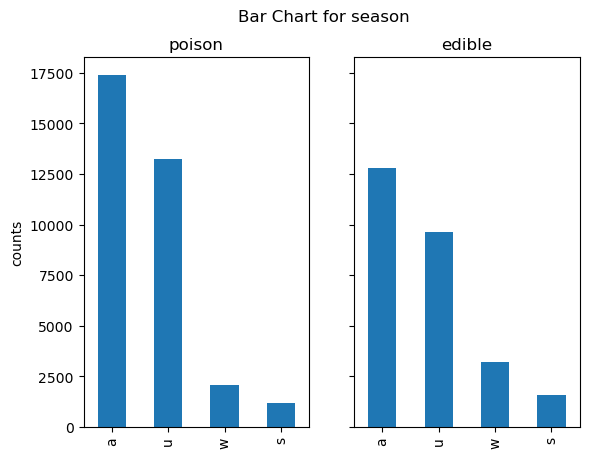

In [48]:
object_columns = df.select_dtypes(include=['object']).columns[1:]

for column in object_columns:
    # Count the occurrences of each category
    poison_C = poison[column].value_counts()
    edible_C = edible[column].value_counts()
    
    # Create a subplot chart
    fig,ax = plt.subplots(1,2,sharey=True)
    
    poison_C.plot(kind='bar',ax=ax[0],title='poison',ylabel='counts')
    edible_C.plot(kind='bar',ax=ax[1],title='edible')
    

    
    fig.suptitle(f'Bar Chart for {column}')
    
    # Show the plot
    plt.show()

By the above bar charts, we can find some pattern to classify poisonous mushroom by categorical features. For example, In `season` bar chart, we can see most poisonous mushrooms live in autumn and summer. And we can find pattern in `veil-color` as well. We can easily classify the mushrooms with yellow veil is edible since there is no poisonous mushroom with yell veil. All the `veil-type` are universal, other than that are missing values.

## Missing values

In [49]:
NA_dict = dict()
for column in df.columns[1:]:
    NA_dict[column] = df[column].isna().sum()

NA_dict

{'cap-diameter': 0,
 'cap-shape': 0,
 'cap-surface': 14120,
 'cap-color': 0,
 'does-bruise-or-bleed': 0,
 'gill-attachment': 9884,
 'gill-spacing': 25063,
 'gill-color': 0,
 'stem-height': 0,
 'stem-width': 0,
 'stem-root': 51538,
 'stem-surface': 38124,
 'stem-color': 0,
 'veil-type': 57892,
 'veil-color': 53656,
 'has-ring': 0,
 'ring-type': 2471,
 'spore-print-color': 54715,
 'habitat': 0,
 'season': 0}

`cap-surface`,`gill-attachment`,`gill-spacing`,`stem-root`,`stem-surface`,`veil-type`,`veil-color`,`ring-type`,`spore-print-color` have missing values. And all of them are categorical. All the missing values here might means unknown or not applicable. I decide to impute them using "?", since I have no idea how these missing values appear and cannot apply imputation strategy like mode or k_nearest. We can let the model to decide and find pattern when they meet the missing values "?".

In [50]:
df= df.fillna('?')

## Feature engineering

In [51]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X = pd.get_dummies(X) # encode categorical data by one-hot-encoding
X = X.astype(float) # convert true and false to 1 and 0
X

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_?,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.60,17.99,18.19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.07,17.80,17.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.17,15.77,15.98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14.64,16.53,17.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61065,1.27,3.18,5.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61066,1.27,3.86,6.37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61067,1.24,3.56,5.44,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Most columns are categorical, so we need to one-hot-encode the categorical columns. Therefore the models can fit the dataset easier.

## Outlier detection

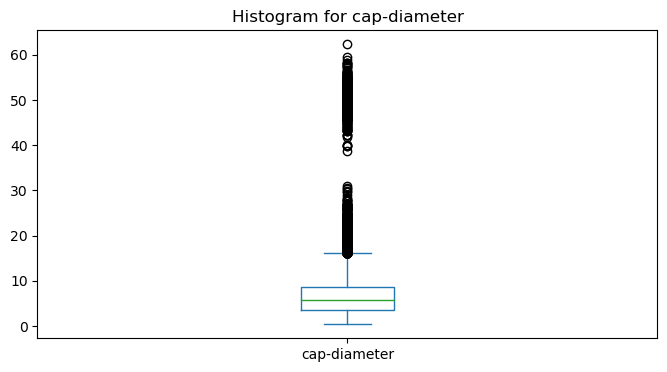

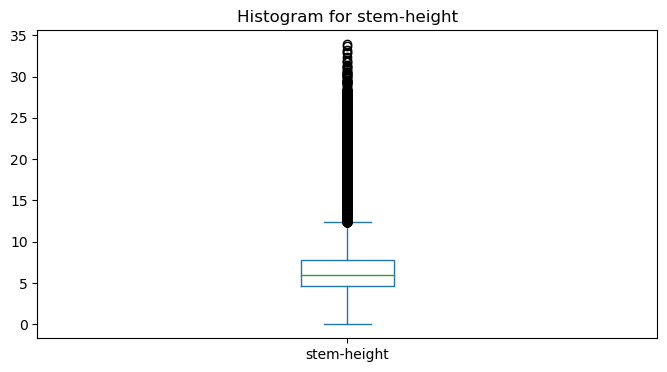

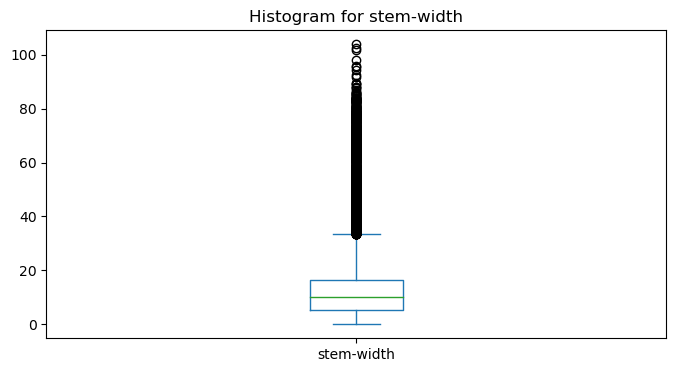

In [52]:
for column in numerical_columns:
    fig, ax = plt.subplots(figsize=(8, 4))
    df[column].plot(kind='box', title=f"Histogram for {column}", ax=ax)
    plt.show()

By the box plot, we can see there are a lot of outlier in the positive side for all numerical columns.

In [53]:
outliers_dict = dict()

for column in numerical_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].loc[:,column]

    outliers_dict[column] = outliers.count()

In [54]:
outliers_dict

{'cap-diameter': 2400, 'stem-height': 3169, 'stem-width': 1967}

Since the amount of outliers is small compare with the total rows, I will not remove any outliers. And I will use ensemble model. They are able to handle the outliers.

# Model Training and Evaluation

The models I will use is logistic regression, Decision Tree, and KNN
* Logistic Regression: simple model, suitable for binary classification especially when the dataset have linear pattern
* Decision Tree: model that is capable for regression and classification. This model is able to find the important features easily, and capture the non-linear pattern which logistic regression cannot.
* KNN: simple model that can capture nonlinear pattern, but it require to compute the distance for all data points which would are complex when the dataset is large.

All of these models are easy to understand and easy to implement, and these models are representor of Gradient_based, Tree-based and Distance-based models.

In [55]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression

In [56]:
# import numpy as np
# import pandas as pd

# class MyLogisticRegression:
    
#     def __init__(self, epochs = 10000, threshold=1e-3,
#                  regularization=None,alpha=0.01) -> None:
        
#         # Initialize parameters and flags for the model.
#         self.epochs = epochs
#         self.threshold = threshold
#         self.regularization = regularization
#         self.alpha = alpha
    
    
#     def train(self, X, y, batch_size=64, lr=1e-3, seed=11, verbose=False):
#         """
#         Train the model using stochastic gradient descent.
#         """
#         # Set seed for reproducibility.
#         np.random.seed(seed) 
        
#         # Define the unique classes and their corresponding indices.
#         self.classes = np.unique(y)
#         self.class_labels = {c: i for i, c in enumerate(self.classes)}
        
#         # Add bias term to the features.
#         X = self.add_bias(X)
        
#         # Convert labels into one-hot encoded format.
#         y = self.one_hot(y)
        
#         # Initialize weights matrix with zeros.
#         self.loss = []
#         self.weights = np.zeros(shape=(len(self.classes), X.shape[1]))
        
#         # Start the training process.
#         self.fit_data(X, y, batch_size, lr, verbose)
#         return self
    
    
    
#     def fit_data(self, X, y, batch_size, lr, verbose):
#         """
#         Fit the data using stochastic gradient descent.
#         """
#         i = 0
#         while (not self.epochs or i < self.epochs):
#             # Compute and store the cross-entropy loss.
#             self.loss.append(self.cross_entropy(y, self.predict_(X)))
            
#             # Randomly select a batch of data.
#             idx = np.random.choice(X.shape[0], batch_size)
#             X_batch, y_batch = X[idx], y[idx]
            
#             # Calculate the error between predicted and true values.
#             error = y_batch - self.predict_(X_batch)
            
#             # Update the weights based on the error and learning rate.
#             update = lr * np.dot(error.T, X_batch)

#             # Apply regularization if specified.
#             if self.regularization == 'Ridge':
#                 update += self.alpha * self.weights
#             elif self.regularization == 'Lasso':
#                 update += self.alpha * np.sign(self.weights)
#             elif self.regularization == 'Elastic Net':
#                 update_w += self.alpha * (self.weights + np.sign(self.weights))

#             self.weights += update

#             # Stop training if updates are smaller than a threshold.
#             if np.abs(update).max() < self.threshold: 
#                 break
            
#             # Print training accuracy every 1000 iterations if verbose is True.
#             if i % 1000 == 0 and verbose: 
#                 print(' Training Accuracy at {} iterations is {}'.format(i, self.evaluate_(X, y)))
#             i += 1
        
#     def predict(self, X):
#         return self.predict_(self.add_bias(X))
    
#     def predict_(self, X):
#         pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
#         return self.softmax(pre_vals)
    
#     def softmax(self, z):
#         return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

#     def predict_classes(self, X):
#         self.probs_ = self.predict(X)
#         return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
#     def add_bias(self,X):
#         return np.insert(X, 0, 1, axis=1)
  
#     def one_hot(self, y):
#         return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
#     def score(self, X, y):
#         '''
#         Accuracy metric
#         '''
#         return round(np.mean(self.predict_classes(X).reshape(-1,1) == y),3)
    
#     def evaluate_(self, X, y):
#         return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
#     def cross_entropy(self, y, probs):
#         return -1 * np.mean(y * np.log(probs))
    
#     def confusion_matrix(self, actual, predicted,norm=False):
#         """
#         Compute the confusion matrix for the given actual and predicted outputs.

#         Args:
#         - actual (array-like): Actual outputs (ground truth).
#         - predicted (array-like): Predicted outputs from the model.

#         Returns:
#         - matrix (np.ndarray): N x N confusion matrix, where N is the number of unique classes.
#         """
      
#         # Create an empty matrix
#         matrix = np.zeros((len(self.classes), len(self.classes)), dtype=float)

#         # Fill the matrix
#         for i, true_class in enumerate(self.classes):
#             for j, pred_class in enumerate(self.classes):
#                 matrix[i, j] = np.sum((actual == true_class) & (predicted == pred_class))

#         if norm:
#             for i in range(len(self.classes)):
#                 total = np.sum(matrix[i])
#                 for j in range(len(self.classes)):
#                     matrix[i,j] = round(matrix[i,j] / total,2)
        
#         matrix_df = pd.DataFrame(matrix, index=self.classes, columns=self.classes)
#         return matrix_df
        

In [57]:
from LogisticRegression import MyLogisticRegression
lm = MyLogisticRegression()
lm.train(train_X.values,train_y.values)

### Training set evaluation

In [58]:
pred_train_y = lm.predict_classes(train_X.values)
lm.confusion_matrix(train_y,pred_train_y)


,e,p
e,20183.0,1624.0
p,7378.0,19670.0


logistic regression can classify `e` much better than p, but the overall performance is great. We treat e as positive and p as negative, then if we misclassify e to p, we call it type 1 error(false positive). And misclassify p as e, we call it type 2 error(false negative). Type 2 is bad for this case, because people eat the poisonous mushrooms which were classified as edible. Therefore, we should increase the overall accuracy or decrease the type 2 error.

In [59]:
print(f'accuracy: {np.mean(pred_train_y == train_y)}')

accuracy: 0.8157404564527684


Logistic regression perform great in training set, acquire 81.5% accuracy.

### Test set evaluation

In [60]:
pred_test_y = lm.predict_classes(test_X.values)
lm.confusion_matrix(test_y,pred_test_y)

,e,p
e,4934.0,440.0
p,1865.0,4975.0


In [61]:
print(f'accuracy: {np.mean(pred_test_y == test_y)}')

accuracy: 0.8112821352546259


The logistic model seems perform about the same in test dataset. It acquires 81.1% accuracy which is just 0.4% lower than the accuracy in test dataset.

### Important features

In [62]:
pd.set_option('display.max_columns', None)
pd.DataFrame(lm.weights,index=[0,1],columns=X.columns.insert(0,'bias'))

,bias,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_?,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_s,cap-surface_t,cap-surface_w,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,does-bruise-or-bleed_f,does-bruise-or-bleed_t,gill-attachment_?,gill-attachment_a,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x,gill-spacing_?,gill-spacing_c,gill-spacing_d,gill-spacing_f,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-root_?,stem-root_b,stem-root_c,stem-root_f,stem-root_r,stem-root_s,stem-surface_?,stem-surface_f,stem-surface_g,stem-surface_h,stem-surface_i,stem-surface_k,stem-surface_s,stem-surface_t,stem-surface_y,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,veil-type_?,veil-type_u,veil-color_?,veil-color_e,veil-color_k,veil-color_n,veil-color_u,veil-color_w,veil-color_y,has-ring_f,has-ring_t,ring-type_?,ring-type_e,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z,spore-print-color_?,spore-print-color_g,spore-print-color_k,spore-print-color_n,spore-print-color_p,spore-print-color_r,spore-print-color_u,spore-print-color_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,-1.465632,0.165223,0.0796,0.092808,-1.341672,-0.191079,0.104998,-0.926183,0.137476,0.482723,0.268105,0.229483,0.241876,-0.66786,0.811854,0.623892,-1.622021,-3.011944,1.189832,0.574294,-0.686148,0.068476,0.782634,1.066569,-1.446941,0.35109,-0.618687,1.166477,0.849755,-0.035764,-0.606174,-2.086839,-0.480523,0.090853,0.284552,-0.827921,-0.637711,-0.801695,-0.893634,-2.158874,1.088682,-0.047301,2.981584,-0.306381,-1.328013,-1.006156,-0.38982,-0.022356,-0.047301,1.247254,-0.938048,-0.047301,0.14095,-0.856506,-0.848034,0.174075,0.24918,0.215163,0.012258,0.46076,-1.275383,2.445175,2.774851,-3.522699,-0.151454,-2.844927,-0.166577,1.212086,-0.151454,-3.119523,-1.049839,-0.006051,-0.816623,1.511848,2.198119,-1.244194,0.460045,-1.315729,-0.151454,1.145737,-0.975333,0.560633,-0.059773,0.901764,-1.59306,-0.379744,-0.795127,1.315065,-0.578656,1.196461,-2.662093,-0.688759,-0.540438,-0.184157,-1.108955,-1.147823,0.706619,1.497881,0.278252,-1.743884,0.88374,-1.047384,-1.160445,0.750416,0.387372,1.548294,-0.894767,1.08723,-3.020089,-0.029702,1.168732,-1.231195,-1.083105,-1.023482,-0.08949,-0.186547,1.009156,-0.585411,-0.645654,-0.198758,-0.226998,0.24723,-0.693242,0.133146,0.504056,-0.962381,0.229055,-1.014429,0.282124
1,1.465632,-0.165223,-0.0796,-0.092808,1.341672,0.191079,-0.104998,0.926183,-0.137476,-0.482723,-0.268105,-0.229483,-0.241876,0.66786,-0.811854,-0.623892,1.622021,3.011944,-1.189832,-0.574294,0.686148,-0.068476,-0.782634,-1.066569,1.446941,-0.35109,0.618687,-1.166477,-0.849755,0.035764,0.606174,2.086839,0.480523,-0.090853,-0.284552,0.827921,0.637711,0.801695,0.893634,2.158874,-1.088682,0.047301,-2.981584,0.306381,1.328013,1.006156,0.38982,0.022356,0.047301,-1.247254,0.938048,0.047301,-0.14095,0.856506,0.848034,-0.174075,-0.24918,-0.215163,-0.012258,-0.46076,1.275383,-2.445175,-2.774851,3.522699,0.151454,2.844927,0.166577,-1.212086,0.151454,3.119523,1.049839,0.006051,0.816623,-1.511848,-2.198119,1.244194,-0.460045,1.315729,0.151454,-1.145737,0.975333,-0.560633,0.059773,-0.901764,1.59306,0.379744,0.795127,-1.315065,0.578656,-1.196461,2.662093,0.688759,0.540438,0.184157,1.108955,1.147823,-0.706619,-1.497881,-0.278252,1.743884,-0.88374,1.047384,1.160445,-0.750416,-0.387372,-1.548294,0.894767,-1.08723,3.020089,0.029702,-1.168

* cap-surface_g:    0.81
* cap-color_l:      1.16
* ring-type_m:      1.54

These are the important features. The important feature in logistic regression would have higher weight

## Decision Tree

In [63]:
# import numpy as np
# import pandas as pd

# class Node():
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, info_gain=None, value=None):
#         ''' constructor ''' 
        
#         # for decision node
#         self.feature_index = feature_index
#         self.threshold = threshold # threshold for splitting data
#         self.left = left
#         self.right = right
#         self.var_red = var_red # index for regressor, choose the highest feature to split
#         self.info_gain = info_gain # index for classifier, choose the highest to split
        
#         # for leaf node
#         self.value = value
        
        

# # ========Regression========================================================
# class DecisionTreeRegressor():
#     def __init__(self, min_samples_split=2, max_depth=2):
#         ''' constructor '''
        
#         # initialize the root of the tree 
#         self.root = None
        
#         # stopping conditions
#         self.min_samples_split = min_samples_split # min elements need to split
#         self.max_depth = max_depth # max depth for tree
        
#     def build_tree(self, dataset, curr_depth=0):
#         ''' recursive function to build the tree '''
        
#         X, Y = dataset[:,:-1], dataset[:,-1]
#         num_samples, num_features = np.shape(X)
#         best_split = {}
#         # split until stopping conditions are met
#         if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
#             # find the best split
#             best_split = self.get_best_split(dataset, num_samples, num_features)
#             # check if information gain is positive
#             if best_split["var_red"]>0:
#                 # recur left
#                 left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
#                 # recur right
#                 right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
#                 # return decision node
#                 return Node(best_split["feature_index"], best_split["threshold"], 
#                             left_subtree, right_subtree, best_split["var_red"])
        
#         # compute leaf node
#         leaf_value = self.calculate_leaf_value(Y)
#         # return leaf node
#         return Node(value=leaf_value)
    
#     def get_best_split(self, dataset, num_samples, num_features):
#         ''' 
#         function to find the best split 
        
#         Returns:
#             Dict: A dict that contains information for best split
#         '''
        
#         # dictionary to store the best split
#         best_split = {}
#         max_var_red = -float("inf")
#         # loop over all the features
#         for feature_index in range(num_features):
#             feature_values = dataset[:, feature_index]
#             possible_thresholds = np.unique(feature_values)
#             # loop over all the feature values present in the data
#             for threshold in possible_thresholds:
#                 # get current split
#                 dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
#                 # check if childs are not null
#                 if len(dataset_left)>0 and len(dataset_right)>0:
#                     y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
#                     # compute information gain
#                     curr_var_red = self.variance_reduction(y, left_y, right_y)
#                     # update the best split if needed
#                     # if curr is higher, update everything
#                     if curr_var_red>max_var_red:
#                         best_split["feature_index"] = feature_index
#                         best_split["threshold"] = threshold
#                         best_split["dataset_left"] = dataset_left
#                         best_split["dataset_right"] = dataset_right
#                         best_split["var_red"] = curr_var_red
#                         max_var_red = curr_var_red
                        
#         # return best split
#         return best_split
    
#     def split(self, dataset, feature_index, threshold):
#         ''' function to split the data using a feature and threshold
        
#         Returns:
#             Tuple: dataset_left, dataset_right
#         '''
        
#         dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
#         dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
#         return dataset_left, dataset_right
    
#     def variance_reduction(self, parent, l_child, r_child):
#         ''' function to compute variance reduction
        
#         Returns:
#             float: measure the information gain for a certain split
#         '''
        
#         weight_l = len(l_child) / len(parent)
#         weight_r = len(r_child) / len(parent)
#         reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
#         return reduction
    
#     def calculate_leaf_value(self, Y):
#         ''' function to compute leaf node using mean
        
#         Returns:
#             float: mean value for given node value
#         '''
        
#         val = np.mean(Y)
#         return val
                
#     def print_tree(self, tree=None, indent=" "):
#         ''' function to print the tree '''
        
#         if not tree:
#             tree = self.root

#         if tree.value is not None:
#             print(tree.value)

#         else:
#             print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
#             print("%sleft:" % (indent), end="")
#             self.print_tree(tree.left, indent + indent)
#             print("%sright:" % (indent), end="")
#             self.print_tree(tree.right, indent + indent)
            
#     def pretty_print(self,node=None,depth=0,prefix="Root: "):
#         '''Print tree in pretty format using post order traversal'''
        
#         if node is None:
#             node = self.root

#         indent = "  " * depth * 4
        
#         if node.value is not None:
#             print(f"{indent}{prefix}Leaf => Value: {round(node.value,2)} | depth: {depth}")
#         else:
#             self.pretty_print(node.right, depth + 1, prefix="R--> ")
#             print(f"{indent}{prefix} X_{node.feature_index} <= {round(node.threshold,2)} | depth: {depth}")
#             self.pretty_print(node.left, depth + 1, prefix="L--> ")
    
#     def fit(self, X, Y):
#         ''' function to train the tree '''
        
#         dataset = np.concatenate((X, Y), axis=1)
#         self.root = self.build_tree(dataset)
        
#     def make_prediction(self, x, tree):
#         ''' function to predict new dataset '''
        
#         if tree.value!=None: return tree.value
#         feature_val = x[tree.feature_index]
#         if feature_val<=tree.threshold:
#             return self.make_prediction(x, tree.left)
#         else:
#             return self.make_prediction(x, tree.right)
    
#     def predict(self, X):
#         ''' function to predict a single data point '''
        
#         preditions = [self.make_prediction(x, self.root) for x in X]
#         return preditions
    
#     def mse(self,y_true, y_pred,verbose=False):
#         ''' Calculate Mean Square Error'''

#         res = np.mean((y_true - y_pred)**2)
#         if verbose:
#             print(f"MSE: {res}")
#         return res
    
#     def r2(self,y_true,y_pred,verbose=False):
#         ''' Calculate r2 score for regressor, range form -inf to 1, higher means better
#         '''
#         y_mean = np.mean(y_true)
        
#         # Calculate total sum of squares
#         SST = np.sum((y_true - y_mean) ** 2)
        
#         # Calculate residual sum of squares
#         SSR = np.sum((y_true - y_pred) ** 2)
        
#         # Calculate R^2 score
#         r2 = 1 - (SSR / SST)
        
#         return r2
    
    
# # ========Regression========================================================
    
    
    
# # ========Classification========================================================
# class DecisionTreeClassifier():
#     def __init__(self, min_samples_split=2, max_depth=2):
#         ''' constructor '''
        
#         # initialize the root of the tree 
#         self.root = None
        
#         # stopping conditions
#         self.min_samples_split = min_samples_split
#         self.max_depth = max_depth
        
#     def build_tree(self, dataset, curr_depth=0):
#         ''' recursive function to build the tree ''' 
        
#         X, Y = dataset[:,:-1], dataset[:,-1]
#         num_samples, num_features = np.shape(X)
        
#         # split until stopping conditions are met
#         if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
#             # find the best split
#             best_split = self.get_best_split(dataset, num_samples, num_features)
#             # check if information gain is positive
#             if best_split["info_gain"]>0:
#                 # recur left
#                 left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
#                 # recur right
#                 right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
#                 # return decision node
#                 return Node(best_split["feature_index"], best_split["threshold"], 
#                             left_subtree, right_subtree,info_gain=best_split["info_gain"])
        
#         # compute leaf node
#         leaf_value = self.calculate_leaf_value(Y)
#         # return leaf node
#         return Node(value=leaf_value)
    
#     def get_best_split(self, dataset, num_samples, num_features):
#         ''' function to find the best split '''
        
#         # dictionary to store the best split
#         best_split = {}
#         max_info_gain = -float("inf")
        
#         # loop over all the features
#         for feature_index in range(num_features):
#             feature_values = dataset[:, feature_index]
#             possible_thresholds = np.unique(feature_values)
#             # loop over all the feature values present in the data
#             for threshold in possible_thresholds:
#                 # get current split
#                 dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
#                 # check if childs are not null
#                 if len(dataset_left)>0 and len(dataset_right)>0:
#                     y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
#                     # compute information gain
#                     curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
#                     # update the best split if needed
#                     if curr_info_gain>max_info_gain:
#                         best_split["feature_index"] = feature_index
#                         best_split["threshold"] = threshold
#                         best_split["dataset_left"] = dataset_left
#                         best_split["dataset_right"] = dataset_right
#                         best_split["info_gain"] = curr_info_gain
#                         max_info_gain = curr_info_gain
                        
#         # return best split
#         return best_split
    
#     def split(self, dataset, feature_index, threshold):
#         ''' function to split the data '''
        
#         dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
#         dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
#         return dataset_left, dataset_right
    
#     def information_gain(self, parent, l_child, r_child, mode="entropy"):
#         ''' function to compute information gain '''
        
#         weight_l = len(l_child) / len(parent)
#         weight_r = len(r_child) / len(parent)
#         if mode=="gini":
#             gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
#         else:
#             gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
#         return gain
    
#     def entropy(self, y):
#         ''' function to compute entropy '''
        
#         class_labels = np.unique(y)
#         entropy = 0
#         for cls in class_labels:
#             p_cls = len(y[y == cls]) / len(y)
#             entropy += -p_cls * np.log2(p_cls)
#         return entropy
    
#     def gini_index(self, y):
#         ''' function to compute gini index '''
        
#         class_labels = np.unique(y)
#         gini = 0
#         for cls in class_labels:
#             p_cls = len(y[y == cls]) / len(y)
#             gini += p_cls**2
#         return 1 - gini
        
#     def calculate_leaf_value(self, Y):
#         ''' function to compute leaf node '''
        
#         Y = list(Y)
#         # return the maximum count element
#         return max(Y, key=Y.count)
    
#     def print_tree(self, tree=None, indent=" "):
#         ''' function to print the tree '''
        
#         if not tree:
#             tree = self.root

#         if tree.value is not None:
#             print(tree.value)

#         else:
#             print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
#             print("%sleft:" % (indent), end="")
#             self.print_tree(tree.left, indent + indent)
#             print("%sright:" % (indent), end="")
#             self.print_tree(tree.right, indent + indent)
            
#     def pretty_print(self,node=None,depth=0,prefix="Root: "):
#         '''Print tree in pretty format using post order traversal'''
        
#         if node is None:
#             node = self.root

#         indent = "  " * depth * 4
        
#         # print leaves node
#         if node.value is not None:
#             print(f"{indent}{prefix}Leaf => Value: {node.value} | depth: {depth}")
#         # print feature node
#         else:
#             self.pretty_print(node.right, depth + 1, prefix="R--> ")
#             print(f"{indent}{prefix} X_{node.feature_index} <= {node.threshold} | depth: {depth}")
#             self.pretty_print(node.left, depth + 1, prefix="L--> ")
    
#     def fit(self, X, Y):
#         ''' function to train the tree '''
        
#         dataset = np.concatenate((X, Y), axis=1)
#         self.root = self.build_tree(dataset)
    
#     def predict(self, X):
#         ''' function to predict new dataset 
        
#         Returns:
#             List: list contains predictions
#         '''
        
#         preditions = [self.make_prediction(x, self.root) for x in X]
#         return preditions
    
#     def make_prediction(self, x, tree):
#         ''' function to predict a single data point '''
        
#         # if the node is leaf node, return the value
#         if tree.value!=None: return tree.value
#         # otherwise travel to left or right node by the threshold
#         feature_val = x[tree.feature_index]
#         if feature_val<=tree.threshold:
#             return self.make_prediction(x, tree.left)
#         else:
#             return self.make_prediction(x, tree.right)
        
#     def accuracy(self, y_true, y_pred):
#         ''' Calculate the accuracy '''
        
#         count = 0
#         N = len(y_true)
        
#         for i in range(N):
#             if y_true[i] == y_pred[i]:
#                 count += 1
        
#         return count / N
# # ========Classification========================================================


In [64]:
from DST import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(min_samples_split=5,max_depth=10)
dt.fit(train_X.values,train_y.values.reshape(-1,1))

KeyboardInterrupt: 

### Training set

In [ ]:
pred_y = dt.predict(train_X.values)

In [ ]:
np.mean(pred_y == train_y)

0.8666052604646403

### test set

In [ ]:
pred_y = dt.predict(test_X.values)
np.mean(pred_y == test_y)

0.8648272474209923

### important features

In [ ]:
dt.pretty_print()

                R--> Leaf => Value: p | depth: 2
        R-->  X_68 <= 0.0 | depth: 1
                        R--> Leaf => Value: p | depth: 3
                L-->  X_107 <= 0.0 | depth: 2
                                R--> Leaf => Value: e | depth: 4
                        L-->  X_72 <= 0.0 | depth: 3
                                        R--> Leaf => Value: p | depth: 5
                                L-->  X_64 <= 0.0 | depth: 4
                                                                R--> Leaf => Value: e | depth: 8
                                                        R-->  X_37 <= 0.0 | depth: 7
                                                                                R--> Leaf => Value: p | depth: 10
                                                                        R-->  X_90 <= 0.0 | depth: 9
                                                                                L--> Leaf => Value: e | depth: 10
                                                

The first 3 split is 2,46,68. Since decision tree will find the use best split in each decision node, the most important features will be in the first coupes splits.

In [ ]:
X.iloc[:,[2,26,68]].columns

Index(['stem-width', 'cap-color_l', 'stem-surface_g'], dtype='object')

'stem-width', 'cap-color_l', 'stem-surface_g' are the important features.

## KNN

In [ ]:
# import numpy as np
# from collections import Counter
# class KNN:
    
#     def __init__(self,k=3):
#         self.k = k
    
#     def fit(self,X,y):
#         self.X_train = X
#         self.y_train = y
        
#     def predict(self,X):
#         pred_y = [self._predict(x) for x in X]
#         return np.array(pred_y) 
        
    
#     def _predict(self,x):
        
#         distances = np.linalg.norm(self.X_train - x, axis=1)

#         # Find the indices of the k nearest neighbors
#         k_index = np.argpartition(distances, self.k)[:self.k]

#         # Retrieve the labels of the k nearest neighbors
#         k_nearest_labels = self.y_train[k_index]
        
#         return list(Counter(k_nearest_labels).keys())[0]


In [ ]:
from pca import PCA
from KNN import KNN
pca = PCA(n_components=2)
pca.fit(X)
X_transform = pca.transform(X)
X_transform = pd.DataFrame(X_transform,columns=['PC1',"PC2"])
train_X,test_X,train_y,test_y = train_test_split(X_transform,y,test_size=0.2,random_state=42)

### Training set

In [ ]:
knn = KNN(k=247)
knn.fit(train_X.values,train_y.values)
pred_y = knn.predict(train_X.values)

In [ ]:
print(f'accuracy: {np.mean(train_y == pred_y)}')

accuracy: 0.6252379490328523


### Test set

In [ ]:
pred_y = knn.predict(test_X.values)
print(f'accuracy: {np.mean(test_y == pred_y)}')

accuracy: 0.6240379891927297


KNN perform worse than logistic regression and Decision Tree. I choose coupe k values: 7,11,21,41 they perform similarly as k=247. The best accuracy i got from KNN is 0.71 which is still worse than other models.

### important feature
KNN cannot find the most important features

# Model selection

* Logistic Regression:
    * run time: 1min
    * Train: 0.815
    * Test: 0.811
* Decision Tree:
    * run time: 3hours
    * Train: 0.866
    * Test: 0.864
* KNN:
    * run time: 1min
    * Train: 0.625 
    * Test: 0.624

The model I will choose is Decision Tree, It has the best performance compare with other two models, but it takes long time to train the model. In addition, Decision Tree can find the important features easily. I think I can optimize the run time using some data structure and using vectorization by numpy.